In [ ]:
from fastai.vision.all import *
import timm

| **Pattern Component** | **Explanation**                                                                                                                                                                                                                                                                                                |
| --------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `^`                   | Asserts the position at the start of the filename.                                                                                                                                                                                                                                                             |
| `([^/]+)`             | **This is the Capturing Group** — the part we want to extract as the label. <br> • `(...)`: The parentheses define the group to be captured. <br> • `[^/]+`: Matches one or more (`+`) characters that are **not** a forward slash (`[^/]`). <br> **Example:** Matches `"Abyssinian"` in `Abyssinian_100.jpg`. |
| `_`                   | Matches the literal underscore character that follows the breed name.                                                                                                                                                                                                                                          |
| `\d+`                 | Matches one or more digits (`\d`) that appear after the underscore. <br> **Example:** Matches `"100"` in `Abyssinian_100.jpg`.                                                                                                                                                                                 |


In [ ]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func(".", get_image_files(path), valid_pct=0.2, seed=42, label_func=RegexLabeller(pat = r"^([^/]+)_\d+"), item_tfms=Resize(224))

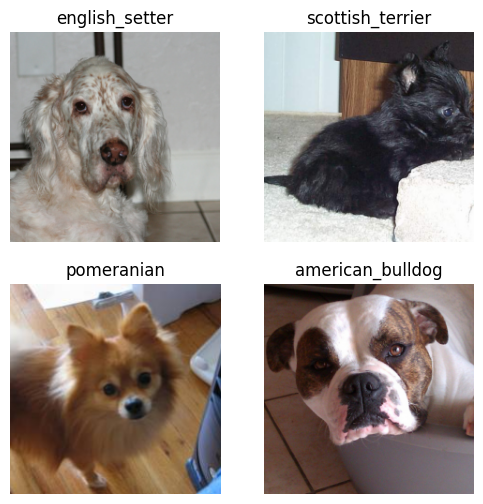

In [ ]:
dls.show_batch(max_n = 4)

In [ ]:
learn = vision_learner(dls, "resnet34", metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.885417,0.479864,0.154939,36:54


epoch,train_loss,valid_loss,error_rate,time
0,0.657286,0.400396,0.127199,53:45
1,0.519318,0.362893,0.110284,53:29


epoch,train_loss,valid_loss,error_rate,time
0,0.657286,0.400396,0.127199,53:45
1,0.519318,0.362893,0.110284,53:29
2,0.415106,0.355141,0.110284,53:27


In [ ]:
timm.list_models("convnext*")

['convnext_atto',
 'convnext_atto_ols',
 'convnext_atto_rms',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnext_zepto_rms',
 'convnext_zepto_rms_ols',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [ ]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate).to_fp16()
learn.fine_tune(3)

/usr/local/lib/python3.12/dist-packages/timm/models/_factory.py:138: UserWarning: Mapping deprecated model name convnext_tiny_in22k to current convnext_tiny.fb_in22k.
  model = create_fn(


model.safetensors:   0%|          | 0.00/178M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.12/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.12/dist-packages/torch/amp/grad_scaler.py:136: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,1.119780,0.233345,0.080514,52:53


epoch,train_loss,valid_loss,error_rate,time


.to_fp16() is a fastai method that enables mixed-precision training.

In short, it makes your model train much faster (often 2-3x) and use significantly less GPU memory, allowing you to use larger models or bigger batch sizes.

**What It Does**:

* By default, neural networks perform all their calculations using 32-bit floating-point numbers (fp32), also known as "single precision."

* Calling .to_fp16() switches the model to use 16-bit floating-point numbers (fp16), or "half-precision," for most of its operations.

* **fp32 (Single Precision)**: 1.2345678 (Very precise, but uses 32 bits of memory)

* **fp16 (Half Precision)**: 1.234 (Less precise, but uses only 16 bits of memory)

**The "Mixed-Precision" Part**:

* It's called "mixed" because it's a smart process that uses both fp16 and fp32:

* Fast fp16 Calculations: It stores the model's weights and performs the main calculations (forward and backward passes) in fp16. Modern NVIDIA GPUs (with Tensor Cores) are extremely fast at fp16 math.

* Stable fp32 Updates: It keeps a master copy of the weights in fp32. When it calculates the small gradient updates, it does so in fp32 to maintain precision and prevent errors. This ensures the model learns stably.

In [ ]:
learn.export('/content/drive/MyDrive/Fastai Pytorch/Lessons/Lesson 3/model.pkl')